<a href="https://colab.research.google.com/github/saideep872/Iris/blob/master/Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from sklearn.datasets import california_housing
from scipy import stats
import seaborn as sns
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import svm

In [132]:
df= pd.read_csv('/content/IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [133]:
df.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
114,5.8,2.8,5.1,2.4,Iris-virginica
112,6.8,3.0,5.5,2.1,Iris-virginica
9,4.9,3.1,1.5,0.1,Iris-setosa
90,5.5,2.6,4.4,1.2,Iris-versicolor
31,5.4,3.4,1.5,0.4,Iris-setosa
140,6.7,3.1,5.6,2.4,Iris-virginica
95,5.7,3.0,4.2,1.2,Iris-versicolor
98,5.1,2.5,3.0,1.1,Iris-versicolor
47,4.6,3.2,1.4,0.2,Iris-setosa
93,5.0,2.3,3.3,1.0,Iris-versicolor


In [134]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [135]:
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
df['species']= label_encoder.fit_transform(df['species']) 
  
df['species'].unique() 

array([0, 1, 2])

In [136]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species           int64
dtype: object

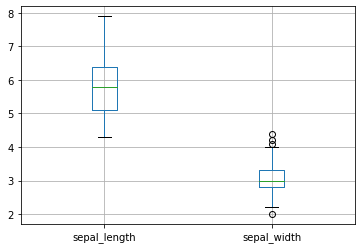

In [137]:
df[['sepal_length','sepal_width']].boxplot()
plt.show()

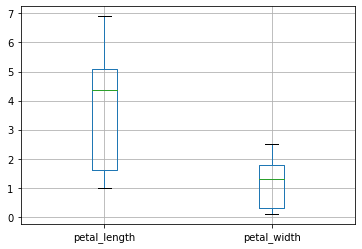

In [138]:
df[['petal_length','petal_width' ]].boxplot()
plt.show()

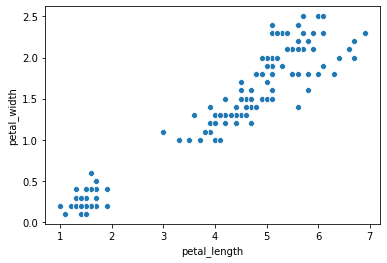

In [139]:
sns.scatterplot(df['petal_length'],df['petal_width'])
plt.show()

In [140]:
from sklearn.preprocessing import StandardScaler

In [141]:
SS_scaler = StandardScaler()

# Fit SS_scaler to the data
SS_scaler.fit(df[['sepal_length','sepal_width','petal_length','petal_width']])

# Transform the data using the fitted scaler
df[['sepal_length','sepal_width','petal_length','petal_width']] = SS_scaler.transform(df[['sepal_length','sepal_width','petal_length','petal_width']])



In [142]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,-0.900681,1.032057,-1.341272,-1.312977,0
1,-1.143017,-0.124958,-1.341272,-1.312977,0
2,-1.385353,0.337848,-1.398138,-1.312977,0
3,-1.506521,0.106445,-1.284407,-1.312977,0
4,-1.021849,1.263460,-1.341272,-1.312977,0


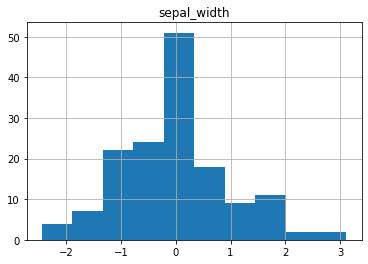

<Figure size 432x288 with 0 Axes>

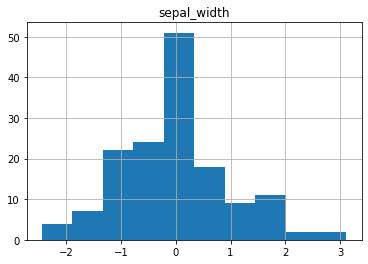

In [143]:
quantile = df['sepal_width'].quantile(0.97)

# Trim the outliers
trimmed_df = df[df['sepal_width'] < quantile]

# The original histogram
df[['sepal_width']].hist()
plt.show()
plt.clf()
df[['sepal_width']].hist()
plt.show()

In [144]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,species
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02,150.000000
mean,-2.775558e-16,-5.140333e-16,1.154632e-16,9.251859e-16,1.000000
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00,0.819232
min,-1.870024e+00,-2.438987e+00,-1.568735e+00,-1.444450e+00,0.000000
25%,-9.006812e-01,-5.877635e-01,-1.227541e+00,-1.181504e+00,0.000000
50%,-5.250608e-02,-1.249576e-01,3.362659e-01,1.332259e-01,1.000000
75%,6.745011e-01,5.692513e-01,7.627586e-01,7.905908e-01,2.000000
max,2.492019e+00,3.114684e+00,1.786341e+00,1.710902e+00,2.000000


In [145]:
X = df.drop('species',axis=1)
y = df.species # Target variable

In [146]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [147]:
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)


y_pred=logreg.predict(X_test)

In [148]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]])

In [149]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [150]:
x_new=X_test.head(1)


In [151]:
X_test.head(1)

,sepal_length,sepal_width,petal_length,petal_width
114,-0.052506,-0.587764,0.762759,1.579429


In [152]:
y_test.head(1)

114    2
Name: species, dtype: int64

In [153]:
yy=logreg.predict(x_new)

In [154]:
yy

array([2])